# Analisis untuk <i>Model Fitness</i>

 Model Fitness adalah waralaba pusat kebugaran. Masalah yang paling dijumpai salah satunya adalah customer churn atau perputaran pelanggan. Untuk mengurangi tingkat churn tersebut, Model Fitness ingin menganalisis profil pengguna guna mengembangkan strategi retensi pelanggan. Tujuan dari kegiatan ini adalah:
- Mempelajari cara memprediksi probabilitas churn (untuk bulan berikutnya) bagi setiap pelanggan
- Membuat segmentasi pengguna dengan memilih kelompok yang paling dominan, dan mendeskripsikan karakter utamanya
- Menganalisis faktor-faktor yang paling memengaruhi churn
- Menarik kesimpulan dasar dan memberikan rekomendasi terkait cara meningkatkan layanan pelanggan 
   - Mengidentifikasi kelompok yang ditargetkan
   - Merekomendasikan langkah-langkah untuk mengurangi churn
   - Menjelaskan pola lain yang Anda temui terkait dengan interaksi pelanggan

Pada kegiatan ini, akan dilakukan pra-pemrosesan yaitu memanggil library dan dataset, lalu eksplorasi data awal, membangun model untuk memprediksi <i>churn</i> pengguna, membuat klaster pengguna, dan menarik kesimpulan.

## Pra-pemrosesan

### Memanggil library

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#model churn pengguna
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
#klaster pengguna
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

In [2]:
import warnings
warnings.filterwarnings('ignore')

<div class="alert alert-success">
<b>Adipta's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

### Memanggil dataset

In [3]:
gym = pd.read_csv('/datasets/gym_churn_us.csv')

## Pengeksplorasian data awal

Dari dataset `gym`, terdapat kolom sebagai berikut:
- `gender`
- `Near_Location` — apakah pengguna tinggal atau bekerja di dekat lokasi pusat kebugaran
- `Partner` — apakah pengguna adalah karyawan perusahaan mitra (pusat kebugaran ini memiliki perusahaan mitra dan para karyawannya mendapatkan diskon; dalam hal ini, pusat kebugaran menyimpan informasi tentang perusahaan tempat kerja pelanggan mereka)
- `Promo_friends` — apakah pengguna awalnya melakukan pendaftaran melalui penawaran "ajak teman" (mereka menggunakan kode promo teman saat membayar keanggotaan pertama mereka)
- `Phone` — apakah pengguna memberikan nomor telepon mereka
- `Age`
- `Lifetime` — waktu (dalam bulan) sejak kunjungan pertama pelanggan ke pusat kebugaran
- `Contract_period` — 1 bulan, 3 bulan, 6 bulan, atau 1 tahun
- `Month_to_end_contract` — sisa bulan sebelum kontrak berakhir
- `Group_visits` — apakah pengguna mengambil bagian dalam sesi kelompok
- `Avg_class_frequency_total` — frekuensi rata-rata kunjungan per minggu selama masa hidup pelanggan
- `Avg_class_frequency_current_month` — frekuensi rata-rata kunjungan per minggu selama bulan sebelumnya
- `Avg_additional_charges_total` — jumlah total uang yang dikeluarkan untuk membayar layanan lain di pusat kebugaran: kafe, barang atletik, kosmetik, pijat, dll.
- `churn` — bagi pelanggan yang telah keluar diberi nilai 0 dan untuk yang masih bertahan diberi nilai 1

In [4]:
gym.shape

(4000, 14)

In [5]:
gym.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [6]:
gym.duplicated().sum()

0

Tidak ada nilai duplikat pada data. Selanjutnya akan dilihat cuplikan data dari dataset

In [7]:
gym.info(memory_usage='deep')
gym.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Dari ringkasan data, dapat terlihat bahwa tidak ada fitur yang hilang yang dapat dilihat bahwa tidak ada nilai hilang. Untuk kolom `gender`, `Near_Location`, `Partner`, `Promo_friends`, `Phone`, `Group_visits`, dan `Churn`, nilai minimum adalah 0 dan maksimum adalah 1 dengan tipe data integer. Dapat disimpulkan bahwa hanya terdapat 2 nilai saja dengan nilai 0 melambangkan False dan 1 adalah True. 

Dari sisanya, dapat dilihat bahwa rata - rata periode kontrak dari member fitnes adalah 4,68 bulan dengan standar deviasi 4,54. Untuk usia dapat dilihat umur rata - rata adalah 29 tahun dengan standar deviasi 3,25. Rata - rata pelanggan membayar tambahan biaya sebesar 146,94 dollar dengan standar deviasi 96,35. Rata - rata pelanggan memiliki sisa waktu langganan member fitnes selama 4,32 bulan dengan standar deviasi 4,19. Rata - rata, pelanggan sudah berlangganan 3,7 bulan sejak kunjungan pertama dengan standar deviasi 3,74. Pelanggan rata - rata menghadiri 1,76 kunjungan per minggu pada bulan sebelumnya dengan standar deviasi 1,05 dan rata - rata pelanggan menghadiri 1,87 kunjungan per minggu selama masa hidup pelanggan dengan standar deviasi 0,97. Untuk periode kontrak dan sisa waktu langganan, nilai standar deviasi ini cukup besar.

In [8]:
gym_category = gym.groupby('Churn')
gym_category.mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


Dari nilai rata - rata berdasarkan `Churn`, dapat dilihat bahwa terdapat nilai yang berbeda cukup signifikan dari `Promo_friends`, `Contract_period`, `Month_to_end_contract`, `Avg_class_frequency_total` dan `Avg_class_frequency_month`. Rata - rata pelanggan yang telah keluar lebih banyak menggunakan kode dari teman, lebih lama mengambil kontrak, lebih lama sisa waktu kontrak, dan lebih banyak mengunjungi fitnes perminggu dibandingkan dengan pelanggan yang masih aktif. Selanjutnya akan digambarkan kurva distribusi dan histogram dari fitur antara kedua kelompok tersebut.

In [9]:
gym_stay = gym[gym['Churn'] == 1].drop('Churn', axis=1)
gym_leave = gym[gym['Churn'] == 0].drop('Churn', axis=1)

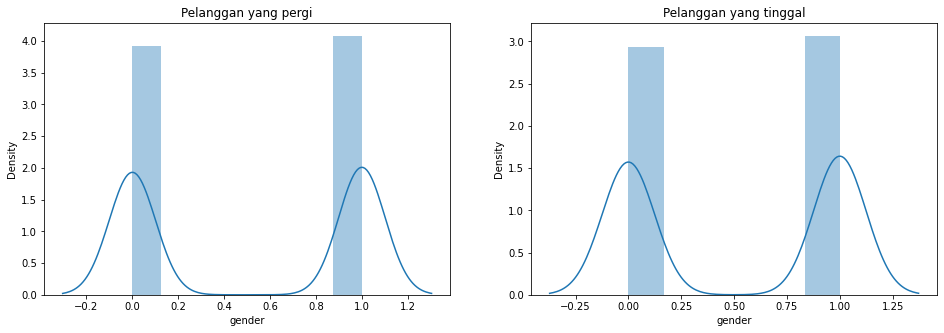

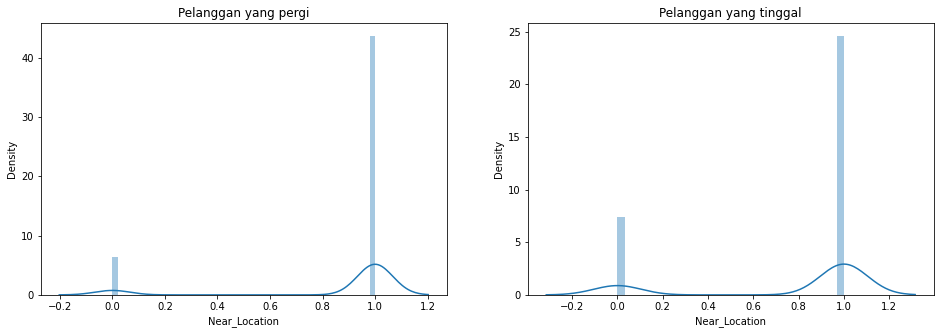

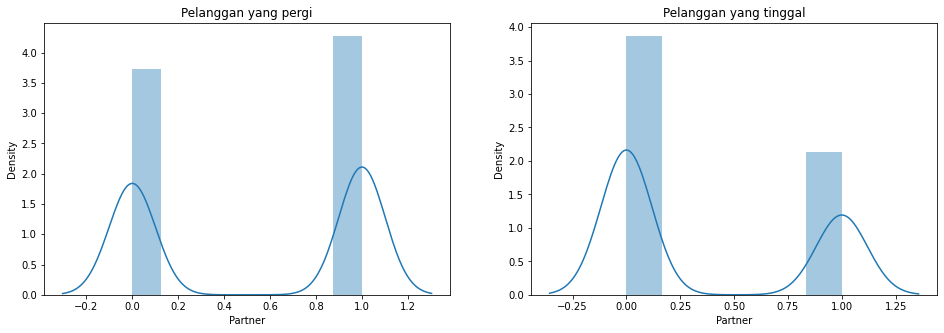

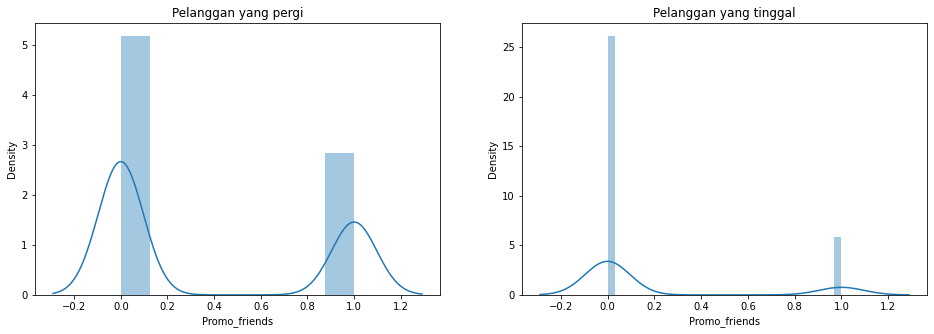

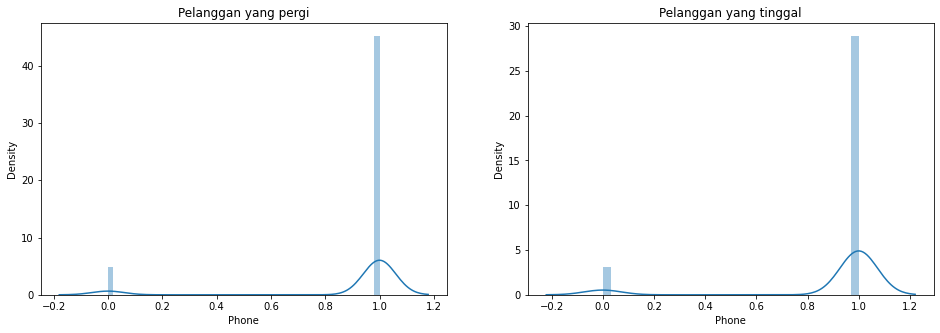

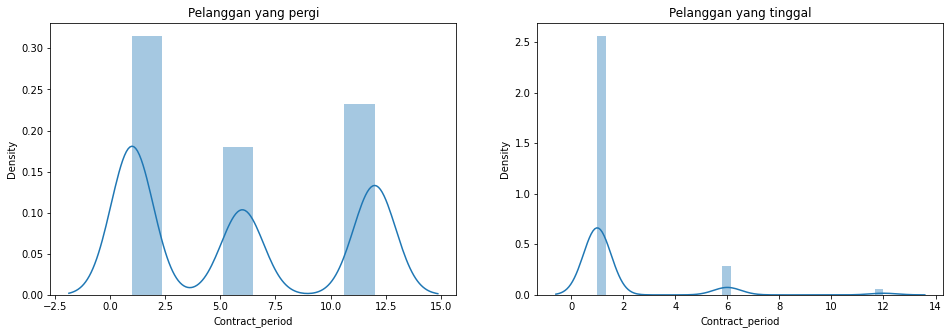

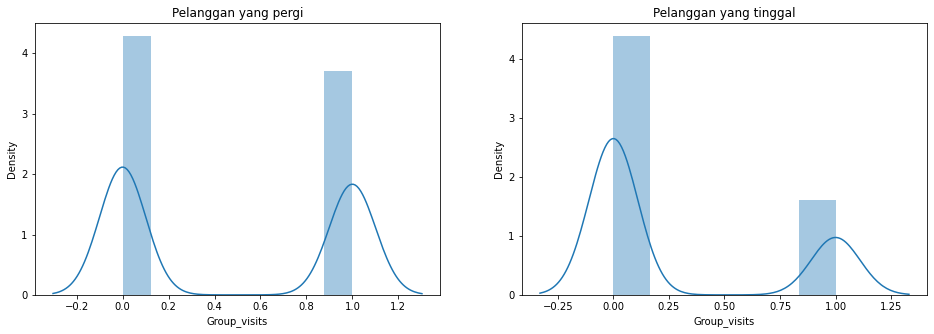

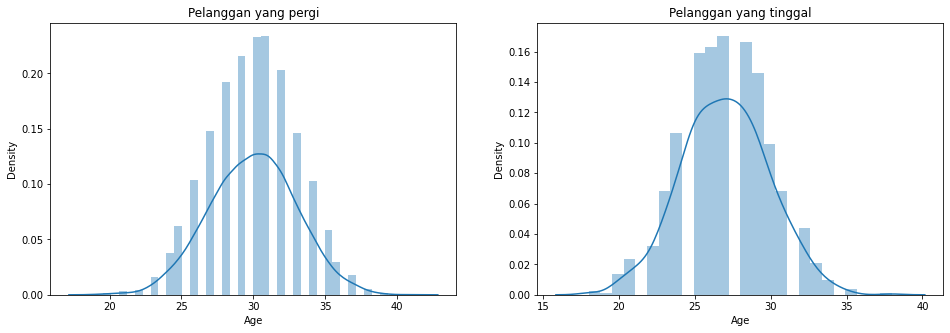

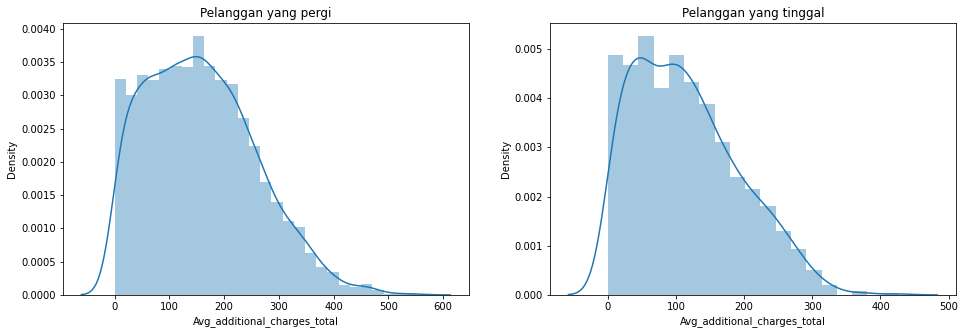

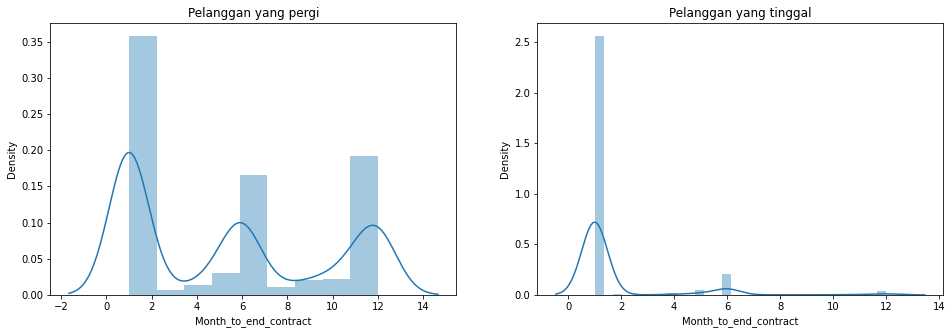

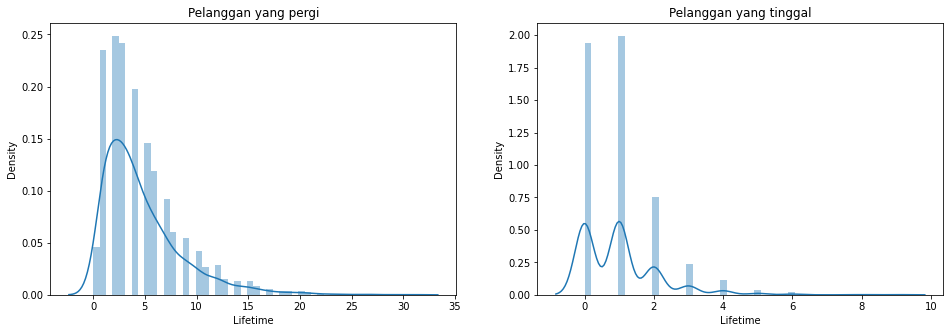

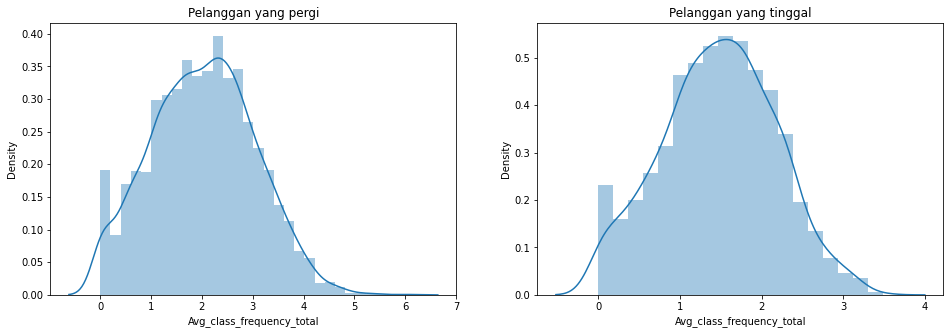

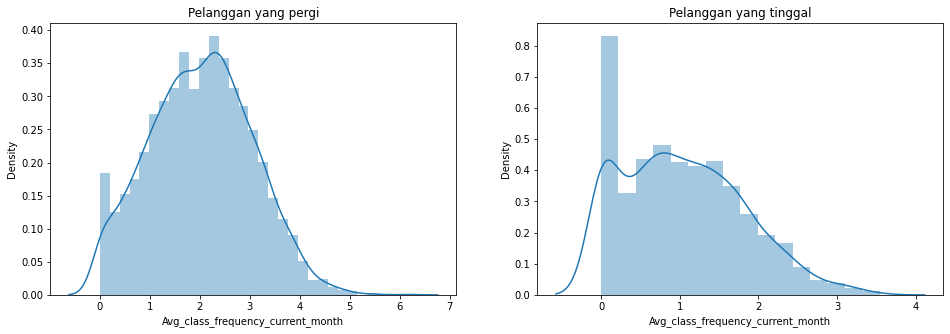

In [10]:
for col in gym_leave:
    fig, axes = plt.subplots(1, 2, figsize=(16, 5))
    axes = axes.reshape(-1)
    
    axes[0].set_title('Pelanggan yang pergi')
    axes[1].set_title('Pelanggan yang tinggal')
    
    sns.distplot(gym_leave[col], ax=axes[0], fit=None)
    sns.distplot(gym_stay[col], ax=axes[1], fit=None)

Dari kurva distribusi dapat diambil beberapa kesimpulan:
- Distribusi genre dari kedua kelompok mirip
- Lebih banyak pelanggan yang telah pergi yang dekat dengan tempat fitness dibanding pelanggan yang masih bertahan
- Lebih banyak pelanggan yang telah pergi memiliki kode promo baik dari mitra maupun ajakan teman
- Distribusi pelanggan yang memberikan nomor telepon dari kedua kelompok mirip
- Pelanggan yang pergi lebih banyak mengambil kontrak yang lebih panjang dibanding pelanggan yang tinggal
- Pelanggan yang pergi lebih banyak mengambil aktivitas kelompok dibandingkan pelanggan yang tinggal
- Pelanggan yang pergi mayoritas lebih tua dibanding pelanggan yang tinggal
- Pelanggan yang pergi lebih banyak menghabiskan duit pada fasilitas tambahan
- Dikarenakan kontrak yang dimiliki pelanggan yang pergi lebih panjang, waktu sejak kunjungan pertama dan sisa bulan sebelum kontak berakhir lebih panjang
- Pelanggan yang pergi lebih sering mengunjungi tempat fitnes per minggu dibanding pelanggan yang tinggal

Selanjutnya akan dibuat matriks korelasi

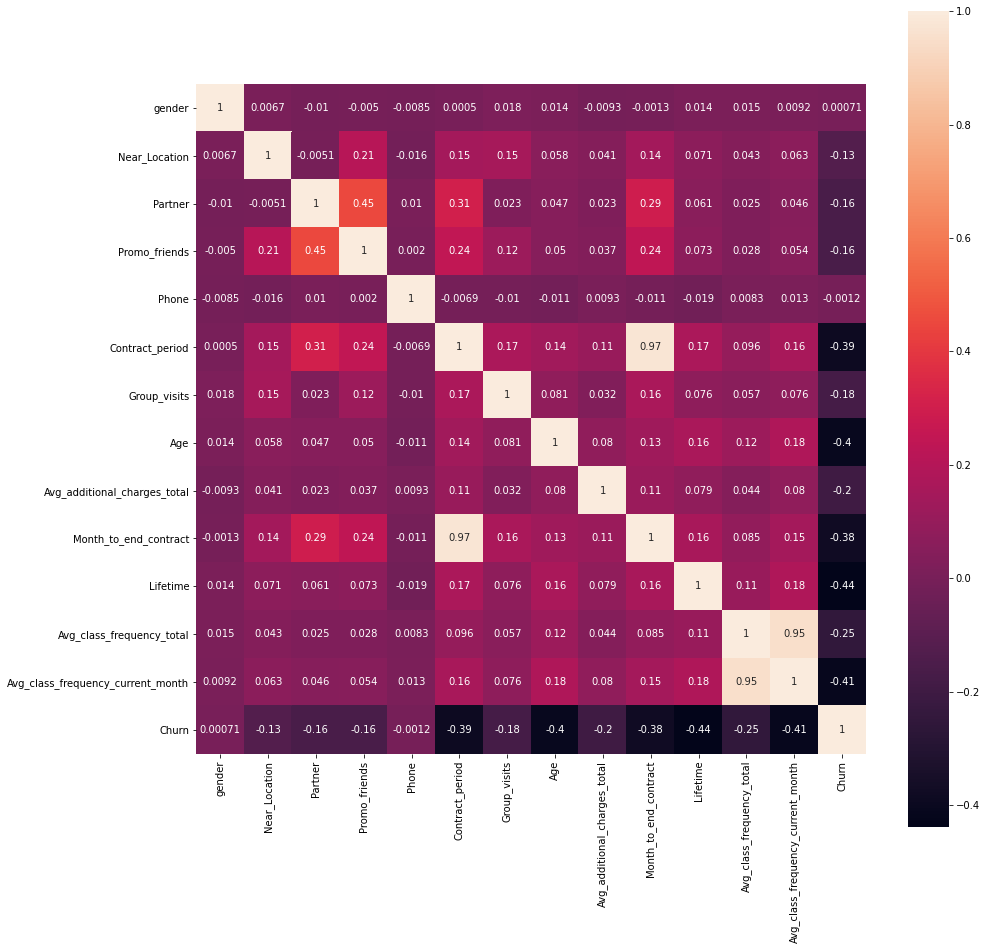

In [11]:
fig = plt.figure(figsize=(15, 15))
cm = gym.corr()

sns.heatmap(cm, annot=True, square=True)
plt.show()

## Membangun model untuk memprediksi churn pengguna

Selanjutnya akan dibuat model klasifikasi biner untuk pelanggan yang fitur targetnya adalah pelanggan yang akan berhenti berlangganan bulan depan. Pertama data akan dipisahkan menjadi 2, yakni data tanpa mengandung kolom `Churn` dan data yang hanya mengandung `Churn`. Lalu membaginya menjadi <i>training set</i> dan <i>validation set</i> dengan rasio pembagian standar 80/20

In [12]:
X = gym.drop(columns=['Churn'])
y = gym['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

Selanjutnya data <i>training set</i> akan dilatih dan diterapkan standardisasi

In [13]:
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)

Lalu pada <i>validation set</i> akan diterapkan pula standardisasi

In [14]:
X_test_st = scaler.transform(X_test)

In [15]:
display(X_train_st[:2], X_test_st[:2])

array([[-1.02724604,  0.42316838,  1.02467945,  1.50398723,  0.33966338,
         1.61618334,  1.19418607,  1.49211656,  0.38640884,  0.64978725,
         0.33267126, -0.84666805, -0.74735039],
       [ 0.97347662,  0.42316838,  1.02467945, -0.66489926,  0.33966338,
        -0.8064055 , -0.83739044, -0.67247193, -1.10861304, -0.78985217,
        -0.196034  ,  0.22688385,  0.4103166 ]])

array([[-1.02724604,  0.42316838,  1.02467945, -0.66489926,  0.33966338,
        -0.8064055 , -0.83739044,  1.49211656, -1.04443977, -0.78985217,
        -0.98909188, -0.90448435, -1.69338907],
       [ 0.97347662,  0.42316838, -0.97591496, -0.66489926,  0.33966338,
        -0.8064055 , -0.83739044, -0.67247193, -1.27210574, -0.78985217,
         0.06831863, -0.51259687, -0.76024453]])

Selanjutnya model akan dilatih menggunakan 2 metode, yakni regresi logistik dan <i>random forest</i>. Kedua model ini akan dibandingkan akurasi, presisi, dan <i>recall</i> untuk membandingkan model dan melihat model apa yang memberikan hasil terbaik

In [16]:
models = [LogisticRegression(random_state=1), RandomForestClassifier(random_state=1)]

In [17]:
def make_prediction(m, X_train, y_train, X_test, y_test):
    model = m
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results = accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred)
    print('\n    Accuracy: {:.2f}\n    Precision: {:.2f}\n    Recall: {:.2f}\n'.format(results[0], results[1], results[2]))

In [18]:
for i in models:
    print(i)
    make_prediction(m=i,X_train = X_train_st, y_train= y_train,
                    X_test=X_test_st, y_test = y_test)

LogisticRegression(random_state=1)

    Accuracy: 0.93
    Precision: 0.88
    Recall: 0.86

RandomForestClassifier(random_state=1)

    Accuracy: 0.92
    Precision: 0.87
    Recall: 0.85



Dari perbedaan antara kedua metode, nilai akurasi, presisi, dan <i>recall</i> pada regresi logistik sedikit lebih baik dibandingkan dengan <i>random forest</i> yang dapat dilihat bahwa nilai tersebut lebih mendekati 1, walaupun perbedaan ini hanya berbeda 0,01 saja. Sehingga dapat disimpulkan regresi logistik memberikan hasil terbaik

## Membuat klaster pengguna

Selanjutnya akan dibuat klaster pengguna. Pertama data akan distandarisasi terlebih dahulu

In [20]:
X_clas = scaler.fit_transform(gym.drop(columns=['Churn']))

Lalu dibuat matriks jarak berdasarkan matriks fitur dan grafik <i>dendrogram</i>

In [26]:
linked = linkage(X_clas, method='ward')

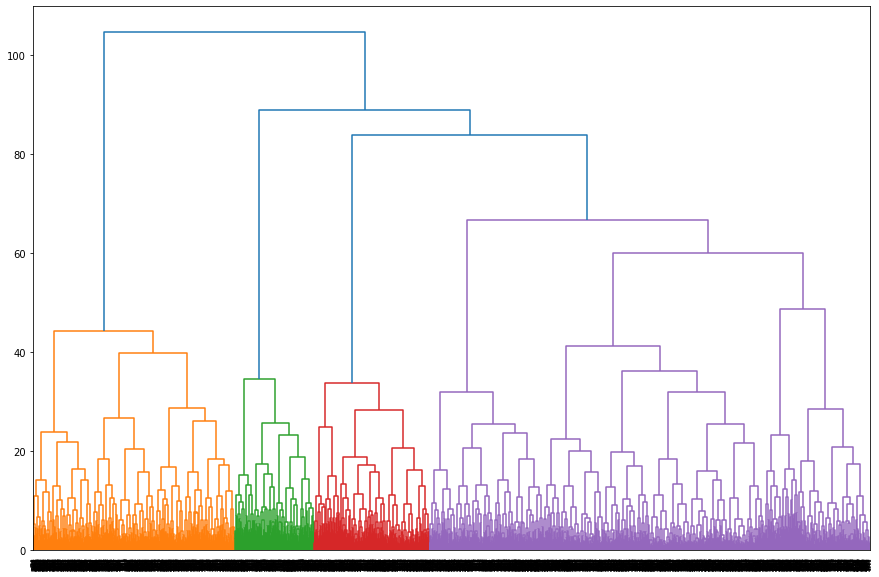

In [28]:
plt.figure(figsize=(15,10))
dendrogram(linked, orientation='top')
fig.show()

Dari <i>denrogram</i> dapat terlihat bahwa terdapat 4 klaster pengguna. Selanjutnya akan dibuat model pengklasteran dengan algoritma <i>K-means</i>

In [33]:
km = KMeans(n_clusters = 4)
km.fit(gym.drop(columns=['Churn']))
labels = km.predict(gym.drop(columns=['Churn']))
labels

array([0, 2, 2, ..., 0, 0, 3], dtype=int32)

Setelah itu nilai klaster ini akan dimasukan ke dataset, dan dilihat nilai per klaster

In [36]:
gym['cluster_km'] = labels
gym.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn,cluster_km
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0,2
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0,2
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0,3


In [39]:
gym.groupby(['cluster_km']).mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
cluster_km,,,,,,,,,,,,,,
0,0.509282,0.823245,0.491525,0.292171,0.908797,4.302663,0.393059,28.953188,42.734136,3.947538,3.456013,1.832499,1.687906,0.347054
1,0.475703,0.849105,0.534527,0.335038,0.923274,5.764706,0.427110,29.838875,336.276165,5.360614,4.309463,1.984329,1.966070,0.076726
2,0.510894,0.847483,0.459053,0.293764,0.896319,4.309542,0.416980,29.045830,130.018773,3.987228,3.587528,1.877123,1.744276,0.299023
3,0.523580,0.867180,0.498556,0.336862,0.898941,5.201155,0.423484,29.390760,221.644225,4.809432,4.000962,1.897295,1.815714,0.195380


Dari rata - rata per kluster, dapat dilihat beberapa hal:
- Untuk penggunaan promo teman, kluster 0 dan 2 memiliki nilai mirip dan lebih kecil dibandingkan dengan kluster 1 dan 3
- Untuk pengguna yang menaruh nomor telepon, kluster 2 dan 3 memiliki nilai yang mirip dan lebih kecil dibandingkan kluster 0 dan 3
- Untuk periode kontrak, kluster 0 dan 2 memiliki nilai yang mirip dan lebih kecil dibandingkan kluster 1 dan 3
- Rata - rata umur paling kecil dimiliki pada kluster 0 , dengan rata - rata umur paling besar dimiliki oleh klaster 1.
- <b>Klaster 1 memiliki pengeluran pada fasilitas lain paling besar yakni 336 dollar, dengan klaster 0 memiliki pengeluaran pada fasilitas lain paling sedikit yakni 43 dollar</b>
- Klaster 0 memiliki sisa bulan sebelum kontrak berakhir paling cepat, dengan klaster 1 memiliki sisa bulan sebelum kontrak paling lama
- Klaster 0 dan 2 memiliki waktu kunjungan sejak kunjungan pertama yang mirip dan paling kecil dibanding klaster 1 dan 3
- Klaster 0 memiliki rata - rata kunjungan per minggu secara keseluruhan paling kecil yakni 1,83 kunjungan, diikuti oleh klaster 2, klaster 3, dan paling banyak klaster 1 dengan hampir 2 kali kunjungan per minggu
- Klaster 0 memiliki rata - rata kunjungan per minggu pada bulan lalu paling kecil yakni 1,69 kunjungan, diikuti oleh klaster 2, klaster 3, dan paling banyak klaster 1 dengan 1,96 kali kunjungan per minggu

Selanjutnya akan dibuat grafik distribusi fitur untuk setiap klaster

In [42]:
#pembagian per klaster
cluster_0 = gym.query('cluster_km == 0').drop('cluster_km', axis=1)
cluster_1 = gym.query('cluster_km == 1').drop('cluster_km', axis=1)
cluster_2 = gym.query('cluster_km == 2').drop('cluster_km', axis=1)
cluster_3 = gym.query('cluster_km == 3').drop('cluster_km', axis=1)

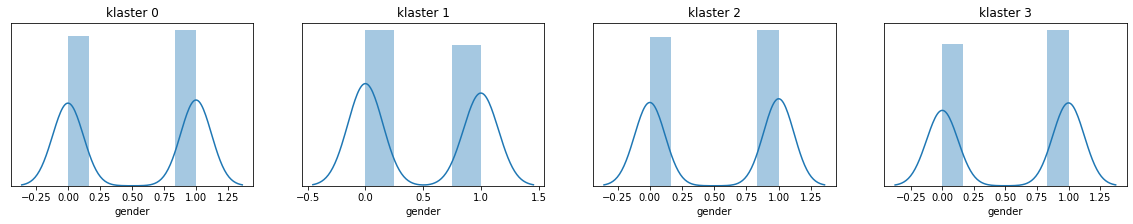

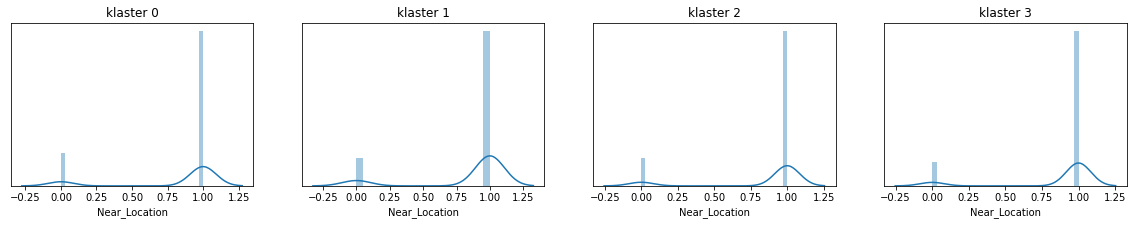

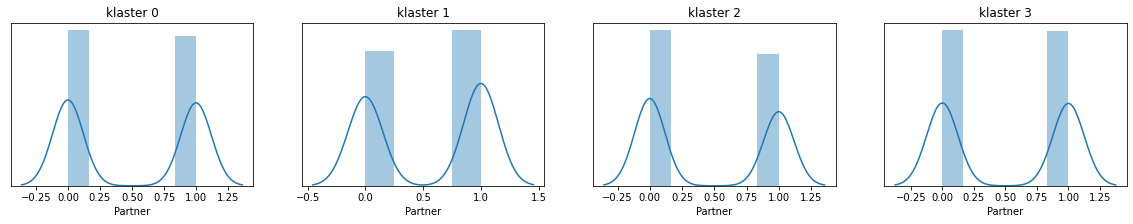

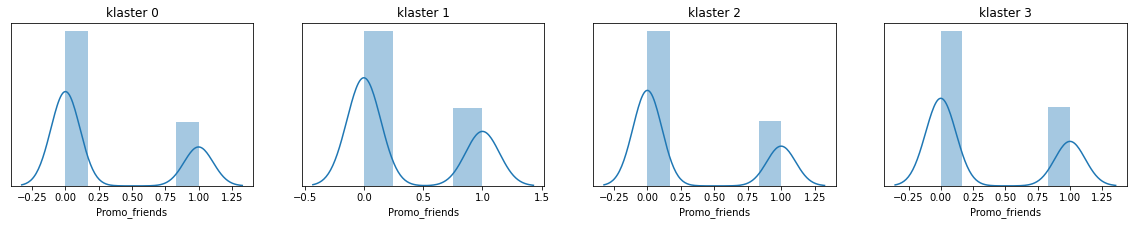

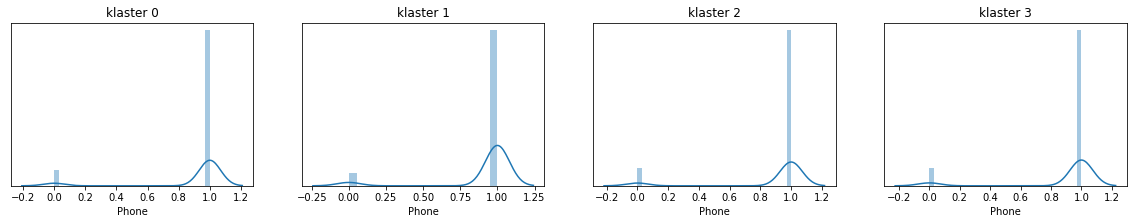

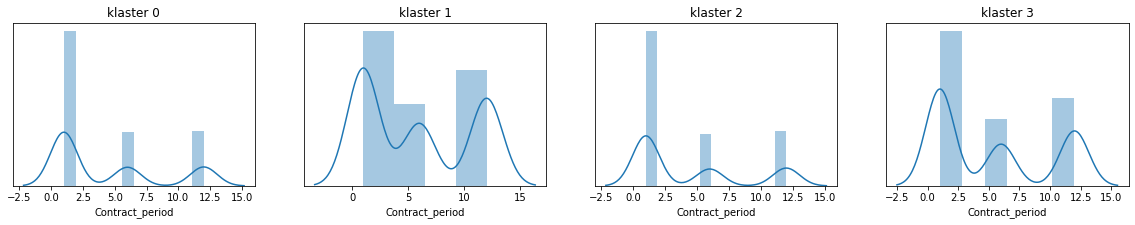

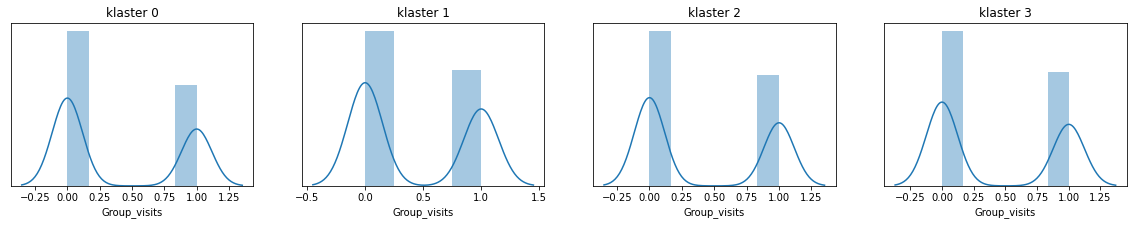

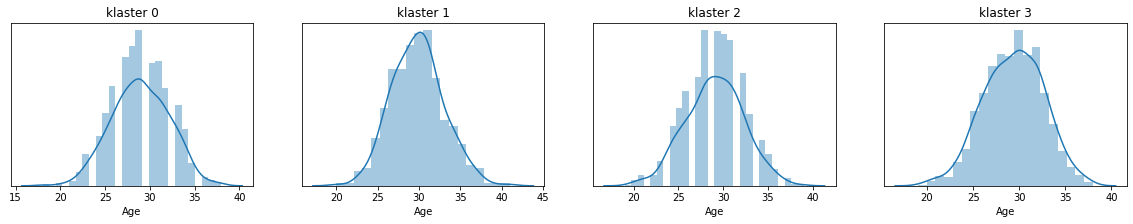

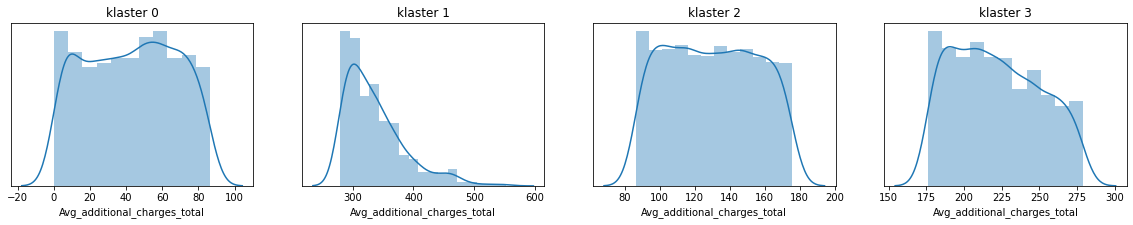

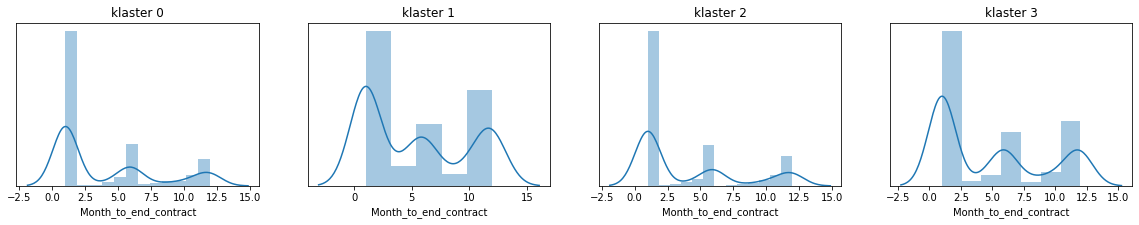

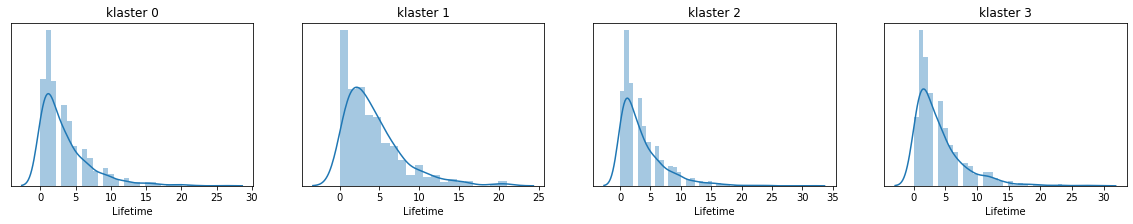

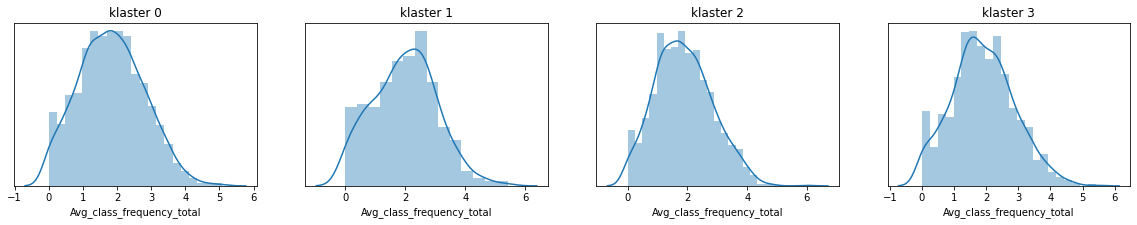

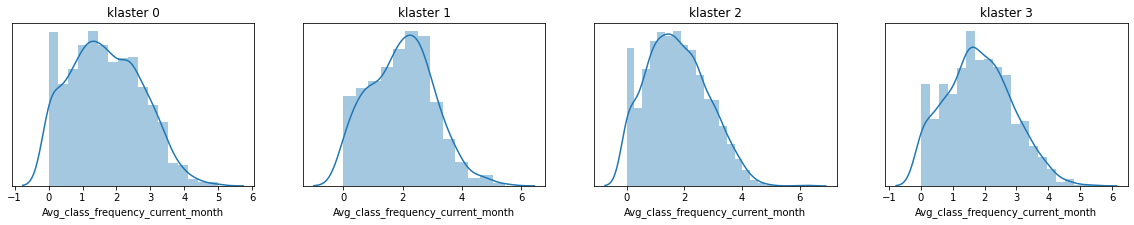

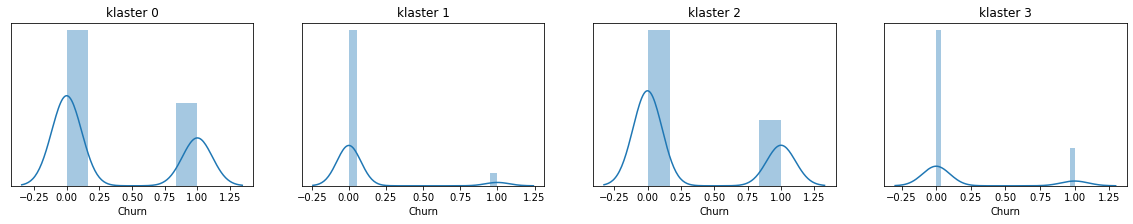

In [44]:
for col in cluster_0.columns:
    fig, axes = plt.subplots(1, 4, figsize=(20, 3))
    axes = axes.reshape(-1)
    
    for i in range(4):
        axes[i].set_title('klaster ' + str(i))
        axes[i].get_yaxis().set_visible(False)
    
    sns.distplot(cluster_0[col], ax=axes[0], hist_kws={'density': True}, fit=None)
    sns.distplot(cluster_1[col], ax=axes[1], hist_kws={'density': True}, fit=None)
    sns.distplot(cluster_2[col], ax=axes[2], hist_kws={'density': True}, fit=None)
    sns.distplot(cluster_3[col], ax=axes[3], hist_kws={'density': True}, fit=None)

Dari kurva distribusi, dapat diambil berbagai kesimpulan:
- Untuk klaster 0 dan 3, proporsi pengguna yang tidak menggunakan promo mitra dan pengguna yang menggunakan promo mitra mirip, klaster 1 lebih banyak pengguna yang menggunakan promo mitra klaster 2 lebih banyak pengguna yang tidak menggunakan promo mitra
- Pada klaster 1 dan 3mayoritas pengguna berumur sekitar 30 tahun, sedangkan untuk klaster 0 banyak pengguna berumur dibawah 30 tahun
-<b>Untuk klaster 0, pengguna menghabiskan uang pada fasilitas tambahan pada rentang 0 - 80 dollar. Untuk klaster 1 mayoritas pengguna menghabiskan uang pada fasilitas tambahan pada 300 dollar. Untuk klaster 2 mayoritas pengguna menghabiskan uang pada fasilitas tambahan pada rentang 90-180 dollar. Untuk klaster 4 mayoritas pengguna menghabiskan uang pada fasilitas tambahan pada 175-275 dollar. </b>
- <b> Pada bulan lalu, banyak pengguna pada klaster 0 dan 2 yang hampir tidak melakukan kunjungan per minggu nya. Untuk klaster 1, banyak pengguna rata - rata mengunjungi tempat fitnes hampir 3 kali perminggu. Sedangkan untuk klaster 2, banyak pengguna rata - rata mengunjungi tempat fitnes hampir 1-2 kali perminggu.</b>
- <b> Pada klaster 1, lebih banyak proporsi pengguna yang akan tinggal, diikuti oleh klaster 3, klaster 2 dan klaster 1 adalah klaster dengan proporsi pengguna yang tetap bertahan lebih tinggi, walaupun mayoritas tetap diisi oleh pengguna yang akan tinggal</b>


## Kesimpulan

Dari kegiatan analisis ini didapat kesimpulan:
- Metode regresi logistik memberikan hasil yang paling baik pada penggunaan untuk dataset ini dibandingkan dengan metode <i>random forest</i>
- Dari <i>K-means</i>, didapatkan bahwa terdapat 4 klaster
- Klaster 0 memberikan pendapatan dari fasilitas lain yang paling sedikit, sedangkan klaster 1 memberikan pendapatan dari fasilitas lain yang paling banyak
- Walaupun demikian, klaster 1 adalah klaster dengan proporsi pelanggan yang akan tinggal lebih tinggi, sedangkan klaster 0 adalah klaster dengan proporsi pelanggan yang akan tinggal lebih rendah.

Sehingga, didapatkan berbagai rekomendasi terkait strategi interaksi dan retensi pelanggan:
- Untuk klaster 1 dan 3, yang proporsi pelanggan akan tinggal lebih tinggi, perlu memberikan suatu tambahan interaksi agar pelanggan pada klaster tersebut bisa tetap bertahan. Contohnya adalah dengan mengadakan survey untuk pelanggan pada klaster tersebut agar menambahkan fitur/fasilitas yang memberikan potensi agar pelanggan tetap bertahan
- Untuk klaster 0 yang jumlah pengeluran pada fasilitas lain paling sedikit, bisa diberikan suatu promo agar pelanggan pada klaster 0 membelanjakan uangnya lebih banyak. Contohnya adalah memberikan diskon pada kafe, kosmetik, dll karena telah berlangganan
- Untuk klaster 0 dan 2 yang lebih banyak proporsi untuk berlangganan hanya 1 bulan saja, bisa ditambahkan promo agar pelanggan bisa berlangganan lebih lama. Contohnya adalah memberikan promo menarik ketika berlanggan untuk 3 bulan atau menambahkan langganan untuk 2 bulan dikarenakan kedua klaster ini adalah klaster dengan rata - rata umur penggunanya ter rendah sehingga kemungkinan pengguna masih tidak berani untuk berlangganan lebih dari 1 bulan karena banyaknya faktor seperti tidak ada dana lebih, adanya kesibukan, dll.